In [ ]:
                    Insurance Cost Analysis

In this project, I perform analytics operations on an insurance database using 19,404 data rows to predict the price of insurance policies using the below mentioned parameters.

Parameter	      Description	                          Content type
age	              Age in years	                          integer
gender	          Male or Female	                      integer (1 or 2)
bmi	              Body mass index	                      float
no_of_children	  Number of children	                  integer
smoker	          Whether smoker or not	                  integer (0 or 1)
region	          Which US region-NW, NE, SW, SE	      integer (1,2,3 or 4 respectively)
charges	          Annual Insurance charges in USD	      float

Objectives
In this project, I will:

Load the data as a pandas dataframe
Clean the data, taking care of the blank entries
Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
Develop single variable and multi variable Linear Regression models for predicting the charges
Use Ridge regression to refine the performance of Linear regression models.

In [1]:
#Importing required libraries
import piplite
await piplite.install('seaborn')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
Import the dataset

In [2]:
#Loading the data file
file_name="insurance.csv"
df = pd.read_csv(file_name)

In [3]:
#Explore the dataset
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
#As we can see that this dataset doesn't have column headings
#Add the headers to the dataframe, as mentioned in the project scenario
headers = ["age", "gender", "bmi", "no_of children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [5]:
#Replace the '?' entries with 'NaN' values
df.replace('?',np.nan, inplace = True)

In [ ]:
Data Wrangling

In [6]:
#Identify the columns that have some 'Null' (or NaN) information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [7]:
#Handle missing data for "age" and "smoker" column
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace = True)
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean()
df["age"].replace(np.nan, mean_age, inplace=True)
# Update data types
df[["smoker", "age"]] = df[["smoker", "age"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [8]:
#Round up the "charges" values to 2 decimal places
df["charges"] = np.round(df["charges"],2)
df.head()

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [ ]:
Exploratory Data Analysis

(0.0, 66902.85800000001)

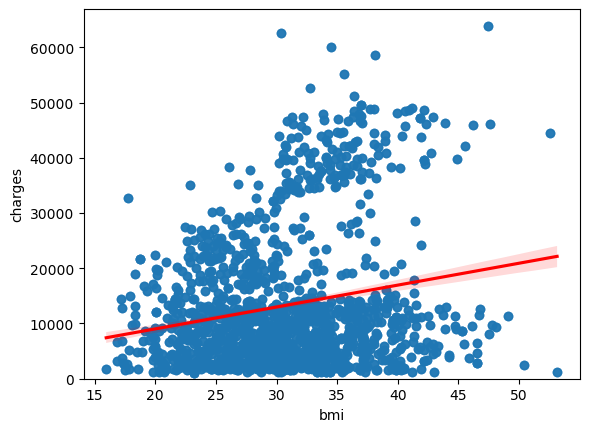

In [9]:
#Implement the regression plot for "charges" with respect to "bmi"
sns.regplot(x="bmi",y="charges", data=df, line_kws={'color':'red'})
plt.ylim(0,)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

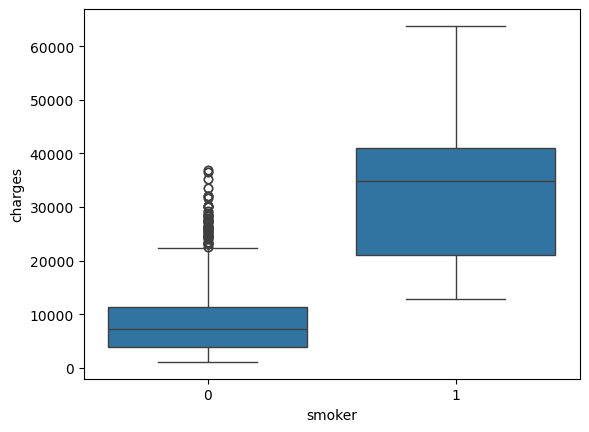

In [10]:
#Implement the box plot for "charges" with respect to "smoker"
sns.boxplot(x="smoker", y="charges", data=df)

In [11]:
#Print the correlation matrix for the dataset
print(df.corr())

                     age    gender       bmi  no_of children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


In [ ]:
Model Development

In [12]:
#Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R-Squared score of this model.
x=df[['smoker']]
y=df[['charges']]
lm=LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))

0.6227430402464125


In [13]:
#Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R-Squared score of this model. You should see an improvement in the performance.
z=df[["age", "gender", "bmi", "no_of children", "smoker", "region"]]
lm.fit(z,y)
print(lm.score(z,y))


0.7505888664568174


In [14]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the "charges" value using all the other attributes of the dataset. There should be even further improvement in the performance.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8453681600043882


In [ ]:
Model Refinement

In [15]:
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)


In [16]:
#Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412217


In [17]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R-Squared score for the testing subset.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172275


In [ ]:
As we can see that the last model demonstrates the highest R-Squared